# Vertex Cover for Tree


## Prepare Data

Consider this tree represented as edges list: 

```
[[1,2], [1,3], [1,4], [3,5], [3,6], [4,7]]
```
Draw this network. 

In [ ]:
# Prepare: Change the working directory. 
# JUST RUN IT ONCE! DON'T run this again!
# JUST MAKE SURE the current working directory output is '/OperationsResearch-Library'!
import os
BASE_DIR = os.path.abspath(".")
# os.chdir(BASE_DIR)
# os.chdir('../../')
print(os.getcwd())

/OperationsResearch-Library/venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


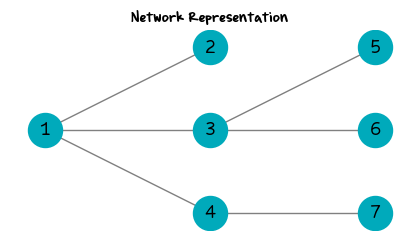

In [ ]:
# Draw the network. 
import importlib
import basics.drawer
importlib.reload(basics.drawer)
from basics.drawer import Drawer
import network_optimization.basics.read_graph as read

edges = [[1,2], [1,3], [1,4], [3,5], [3,6], [4,7]]

# Custom layout of vertices on the canvas
layers = [[1], [2,3,4], [5,6,7]]

drawer = Drawer()
drawer.draw_network_from_edges(edges=edges, directed_graph=False, weighted_graph=False, custom_layers=layers, figsize=(4,2), node_color='#00AABB')

In [ ]:
def minimum_vertex_cover_for_tree(adjList : map):
    """
    Compute the minimum vertex cover 
    """
    n = len(adjList.keys())
    
    # DP table: 
    #   dp[u][0] = min cover size for the subtree rooted at u, excluding u
    #   dp[u][1] = min cover size for the subtree rooted at u, including u
    dp = [[0, 0] for _ in range(n + 1)]
    visited = [False] * (n + 1)
    selected_vertices = []

    def dfs(u):
        """
        Use DFS to iterate nodes starting from u.

        Args: 
            u: start node 
        """ 
        visited[u] = True
        # Initial table for node u.
        dp[u][0] = 0
        dp[u][1] = 1

        for neighbor in adjList[u]: 
            if not visited[neighbor]:
                # neighbors that are not visited yet are children of u. 
                
                # Each child is denoted as v in the formula. 
                v = neighbor

                dfs(v)
                # If vertex cover does not include u, all subtrees rooted at children of u should be included.
                # (And because G is a tree, substrees rooted at different children are disjoint.)
                dp[u][0] += dp[v][1]

                # If vertex cover includes u, any child of u can be either included or excluded. Choose the one with minimum size. 
                dp[u][1] += min(dp[v][0], dp[v][1])
        return
    
    dfs(u=1)
    return min(dp[1][0], dp[1][1]), dp

adjList = read.create_adj_list(edges, directed_graph=False)

res, dp = minimum_vertex_cover_for_tree(adjList)
print(f'The size of minimum vertex cover :{res}')
# Print the dp table:
print('\nDP table: ') 
for i, table in enumerate(dp):
    if i == 0: 
        continue 
    print(f'dp({i}) = {table}')


The size of minimum vertex cover :3

DP table: 
dp(1) = [3, 3]
dp(2) = [0, 1]
dp(3) = [2, 1]
dp(4) = [1, 1]
dp(5) = [0, 1]
dp(6) = [0, 1]
dp(7) = [0, 1]


In [66]:
def track_vertices(adjList : list, dp : list): 
    """
    Track and find out the vertices selected from the dp tables. 
    """
    n = len(adjList.keys())
    
    visited = [False] * (n + 1)
    
    selected = []
    
    def reconstruct(u, parent_included):
        """
        Reconstruct the process starting from u. 
        
        Args: 
            u: current vertex.
            parents_included: indicates whether the parent of u is included or not. 
        """
        visited[u] = True
        
        if parent_included:
            # If parent of u is included, then u can be either included or excluded. 
            if dp[u][1] <= dp[u][0]:
                # If including u leads to a smaller size, then append u to the selected list. 
                selected.append(u)
                for v in adjList[u]:
                    if not visited[v]:
                        reconstruct(v, True)
            else:
                for v in adjList[u]:
                    if not visited[v]:
                        reconstruct(v, False)
        else:
            # If parent of u is NOT included, then u must be included. 
            selected.append(u)
            for v in adjList[u]:
                if not visited[v]:
                    reconstruct(v, True)
        return 
    
    root_included = dp[1][1] < dp[1][0]
    reconstruct(1, root_included)
    
    return selected

selected = track_vertices(adjList, dp)

print(f'The vertices selected are: {selected}')


The vertices selected are: [1, 3, 4]


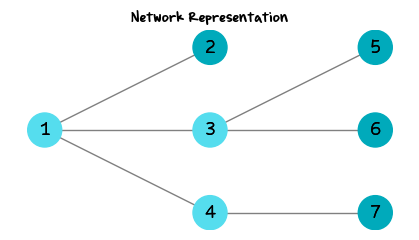

In [75]:
# Dye thoes selected vertices
importlib.reload(basics.drawer)
node_colors = []
for node in adjList.keys(): 
    if node in selected:
        node_colors.append('#55DDEE')
    else: 
        node_colors.append('#00AABB')

drawer.draw_network_from_edges(edges=edges, directed_graph=False, weighted_graph=False, custom_layers=layers, figsize=(4,2), node_color=node_colors)